# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse_metadata and the study_results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data from the two csv files into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
df = study_data_complete
print (df.columns)
study_data_complete.head()

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice
number_of_mice = study_data_complete.value_counts(subset='Mouse ID')
number_of_mice.count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = df[df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mouse_data = pd.DataFrame(duplicate_mouse_ids)
duplicate_mouse_data.head()

,0
0,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete.drop_duplicates (subset= 'Mouse ID', keep='first', inplace=False, ignore_index=False)
study_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
new_number_of_mice = study_data_clean.value_counts(subset='Mouse ID')
new_number_of_mice.count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print (summary_stats)

              mean  median  var  std  sem
Drug Regimen                             
Capomulin     45.0    45.0  0.0  0.0  0.0
Ceftamin      45.0    45.0  0.0  0.0  0.0
Infubinol     45.0    45.0  0.0  0.0  0.0
Ketapril      45.0    45.0  0.0  0.0  0.0
Naftisol      45.0    45.0  0.0  0.0  0.0
Placebo       45.0    45.0  0.0  0.0  0.0
Propriva      45.0    45.0  0.0  0.0  0.0
Ramicane      45.0    45.0  0.0  0.0  0.0
Stelasyn      45.0    45.0  0.0  0.0  0.0
Zoniferol     45.0    45.0  0.0  0.0  0.0


## Bar and Pie Charts

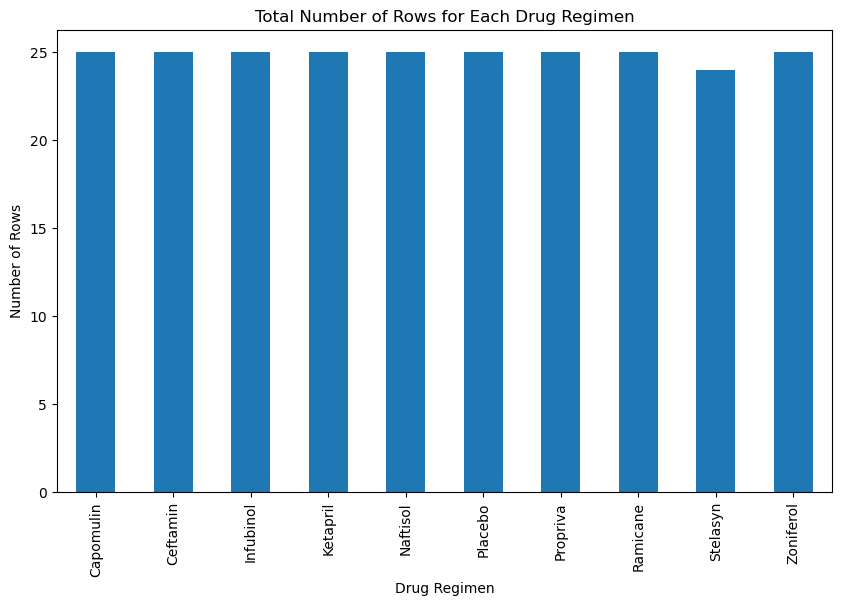

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = study_data_clean.groupby('Drug Regimen').size()

plt.figure(figsize=(10, 6))
regimen_counts.plot(kind='bar')

# Add labels and title to the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Display the plot
plt.show()


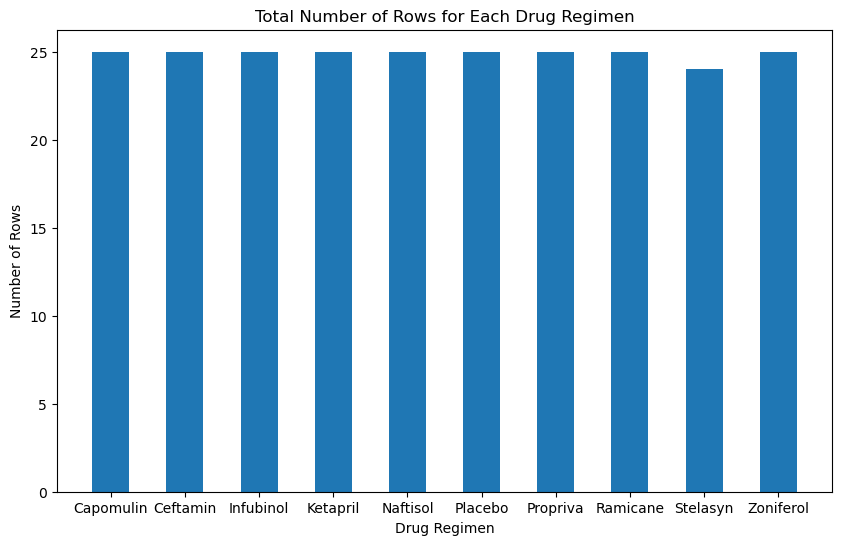

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, width=0.5)

# Add labels and a title to the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Display the plot
plt.show()

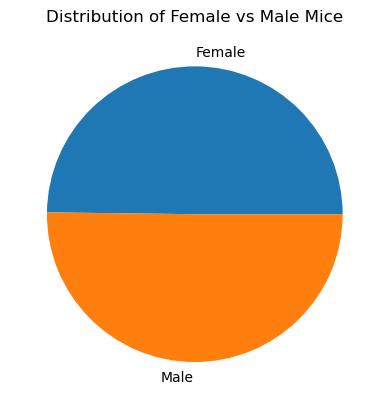

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = study_data_clean.groupby('Sex').size()
sex_distribution.plot(kind='pie')
plt.title('Distribution of Female vs Male Mice')

plt.show()

Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

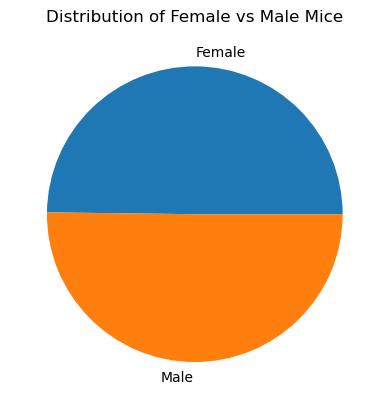

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plt.pie(sex_distribution, labels=labels)
plt.title('Distribution of Female vs Male Mice')


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = study_data_clean.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max = pd.merge(max_timepoint, study_data_clean, on=['Mouse ID', 'Timepoint'], how='left')
merged_max.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.0,0,Infubinol,Female,20,23
1,a251,0,45.0,0,Infubinol,Female,21,25
2,a262,0,45.0,0,Placebo,Female,17,29
3,a275,0,45.0,0,Ceftamin,Female,20,28
4,a366,0,45.0,0,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
reatments = study_data_clean['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
